In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [163]:
df = pd.read_csv('../data/splice_data.csv')

In [164]:
# Handle null values in text column
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].fillna('')

vectorizer = TfidfVectorizer(
    stop_words='english',
    token_pattern=r'(?u)\b(?!x{2,}\b)(?!X{2,}\b)[A-Za-z]\w+',
    min_df= 5,
    max_df=1.0,
    ngram_range=(1, 3),
    max_features=1000)
x = vectorizer.fit_transform(df['consumer_complaint_narrative'])

In [165]:
k = 5 ## test diffrent variable amounts
kmeans = KMeans(n_clusters=k, random_state=25)
labels = kmeans.fit_predict(x)

In [166]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print(f"\nCluster {i} top terms:")
    for j in order_centroids[i, :10]:  # Top 10 terms
        print(terms[j], end=", ")



Cluster 0 top terms:
credit, report, credit report, information, accounts, reporting, account, inaccurate, consumer, items, 
Cluster 1 top terms:
identity, theft, identity theft, victim identity, victim, victim identity theft, credit, report, information, accounts, 
Cluster 2 top terms:
account, payment, late, loan, bank, card, payments, credit, mortgage, told, 
Cluster 3 top terms:
section, consumer, usc, usc section, section states, states, consumer reporting, reporting, consumer reporting agency, reporting agency, 
Cluster 4 top terms:
debt, collection, credit, company, account, paid, collection agency, collector, report, original, 

Average silhouette score: 0.033


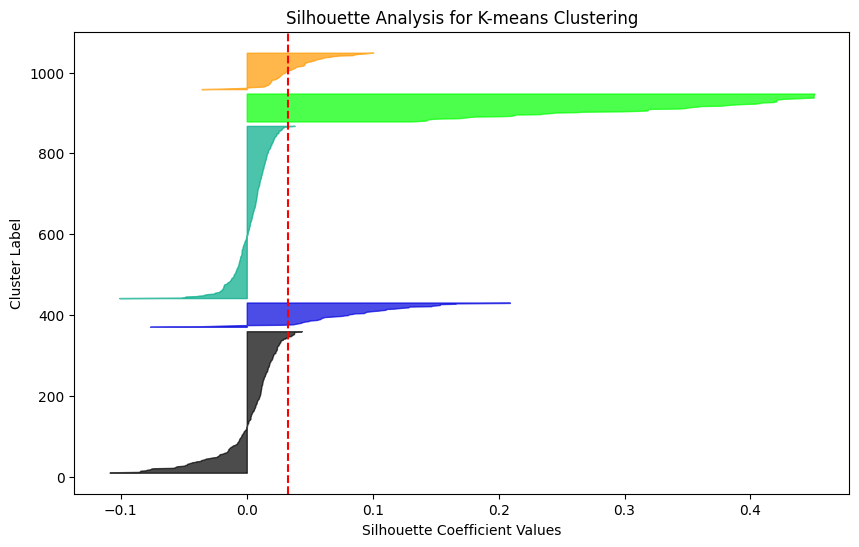

In [167]:

# Overall silhouette score
silhouette_avg = silhouette_score(x, labels)
print(f"Average silhouette score: {silhouette_avg:.3f}")

# Silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x, labels)

# Plot silhouette analysis
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
y_lower = 10

for i in range(k):
    cluster_silhouette_values = sample_silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title('Silhouette Analysis for K-means Clustering')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.show()

In [168]:
ch_score = calinski_harabasz_score(x.toarray(), labels)
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

Calinski-Harabasz Score: 19.546
